In [1]:
%matplotlib inline

In [2]:
# Import python modules
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
from shapely.geometry import Point
import gc, sys, os
sys.path.append("../scripts")
import spatial_functions
import aem_utils
import netcdf_utils
import plotting_functions as plots

In [3]:
# Import the lci data

infile = r"C:\Users\symin\OneDrive\Documents\GA\AEM\LCI\Injune_lci_MGA55.nc"

# Create an instance
lci = aem_utils.AEM_inversion(name = 'Laterally Contrained Inversion (LCI)',
                              inversion_type = 'deterministic',
                              netcdf_dataset = netCDF4.Dataset(infile))
# Create polylines
lci.create_flightline_polylines()

In [4]:
# Now grid the lci sections

lines = [200601]

# Assign the lci variables to grid
grid_vars = ['conductivity', 'data_residual', 'depth_of_investigation']


# Define the resolution of the sections
xres, yres = 20., 2.


# Define the output directory if saving the grids as hdf plots

lci.grid_sections(variables = grid_vars, lines = lines, xres = xres, yres = yres,
                  return_interpolated = True, save_hdf5 =False)



In [63]:
import importlib
importlib.reload(aem_utils)
importlib.reload(spatial_functions)
# Import the AEM data

infile = r"C:\Users\symin\OneDrive\Documents\GA\AEM\EM\AUS_10024_InJune_EM_MGA55.nc"

em = aem_utils.AEM_data(name = 'Injune AEM data',
                              system_name = 'SkyTEM312',
                              netcdf_dataset = netCDF4.Dataset(infile))
# Now grid the em data and sections

# Assign the lci variables to grid
grid_vars = ['low_moment_Z-component_EM_data', 'high_moment_Z-component_EM_data', 'roll', 'pitch',
             'tx_height_measured', 'powerline_noise', 'gps_height']

# Define the output directory if saving the grids as hdf plots

em.interpolate_variables(variables = grid_vars, lines = lines, xres = xres,
                         return_interpolated = True, save_hdf5 =False)

(1635, 18)
(1635, 23)


../scripts\spatial_functions.py:343: RuntimeWarning: invalid value encountered in log10
  
../scripts\spatial_functions.py:343: RuntimeWarning: divide by zero encountered in log10
  


In [64]:
em.section_data

{200601: {'roll': array([4.80999994, 4.49945289, 4.32040219, ..., 5.00964947, 4.90312293,
         4.79229434]),
  'pitch': array([-1.55547929, -1.41374058, -0.79990962, ...,  3.82179767,
          4.80535227,  5.83219346]),
  'tx_height_measured': array([103.84999847,  96.49212502,  89.98571614, ..., 102.68403343,
         102.53485651, 102.29201738]),
  'powerline_noise': array([  1.90999997,   1.91999996,   1.95471841, ..., 116.68313536,
         124.70115014, 134.01583048]),
  'gps_height': array([502.44000244, 501.40156975, 500.4428834 , ..., 431.20912591,
         432.25635116, 433.4970705 ]),
  'easting': array([683328.625     , 683347.14305333, 683365.50467624, ...,
         711292.2499316 , 711312.18576288, 711332.15587371]),
  'northing': array([7146402.5       , 7146410.05032854, 7146417.97586498, ...,
         7147275.85964527, 7147277.44795258, 7147278.5321076 ]),
  'elevation': array([398.58999634, 404.90944434, 410.45222188, ..., 328.52508044,
         329.72149415, 331.

c:\users\symin\anaconda3\envs\aem_interp\lib\site-packages\ipykernel_launcher.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator


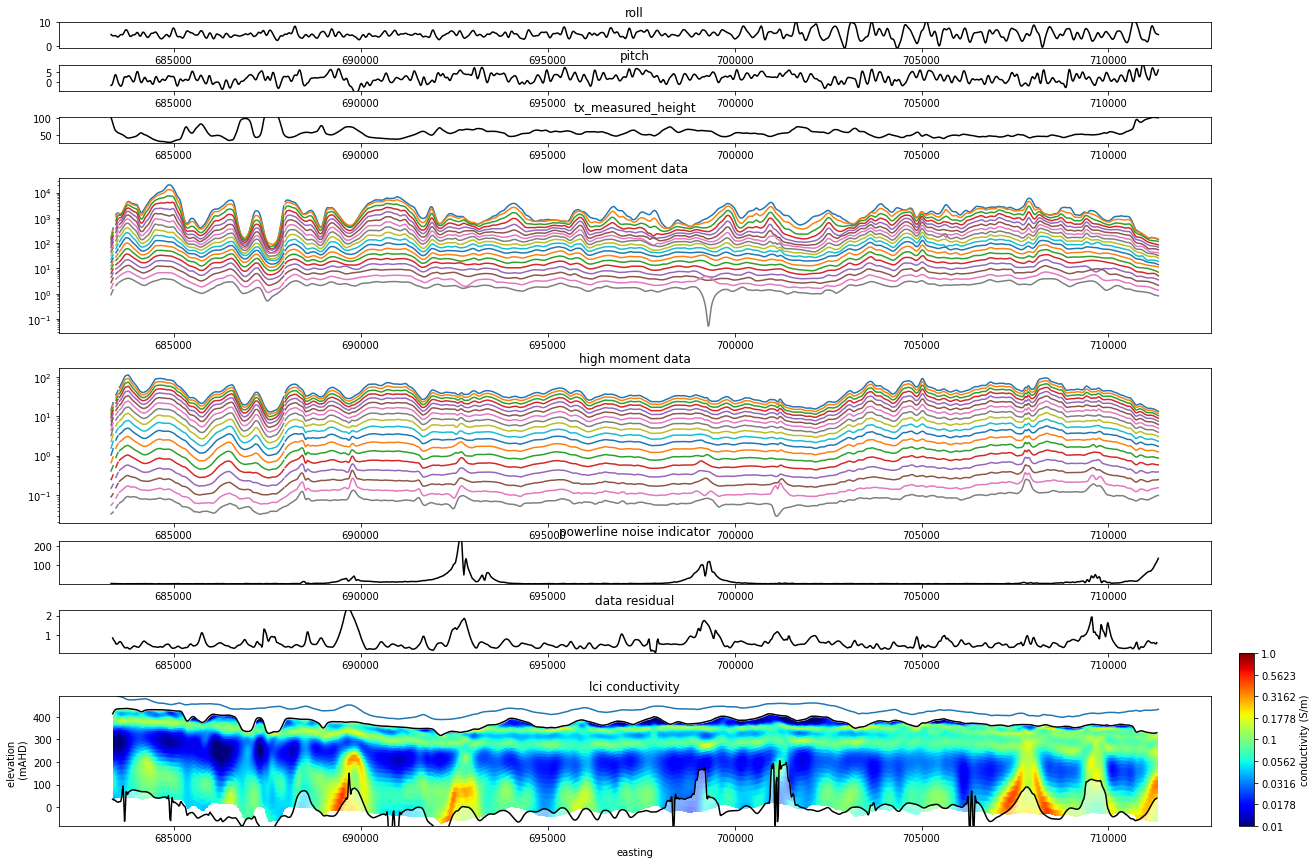

In [67]:
# Create a multi-plot section

line = lines[0]

# Composite plot
plt.close('all')
fig = plt.figure(figsize = (20,12))

# Add two axes for the data misfit and the conductivity
#
ax1 = fig.add_axes([0.1, 0.95, 0.8, 0.03])
ax2 = fig.add_axes([0.1, 0.9, 0.8, 0.03], sharex = ax1)
ax3 = fig.add_axes([0.1, 0.84, 0.8, 0.03], sharex = ax1)
ax4 = fig.add_axes([0.1, 0.62, 0.8, 0.18],sharex = ax1)
ax5 = fig.add_axes([0.1, 0.4, 0.8, 0.18], sharex = ax1)
ax6 = fig.add_axes([0.1, 0.33, 0.8, 0.05], sharex = ax1)
ax7 = fig.add_axes([0.1, 0.25, 0.8, 0.05], sharex = ax1)
ax8 = fig.add_axes([0.1, 0.05, 0.8, 0.15], sharex = ax1)

cbar_ax = fig.add_axes([0.92, 0.05, 0.01, 0.2])


roll = plots.plot_single_line(ax1, em.section_data[line], 'roll',
                              x_ax_var='easting')
ax1.set_title('roll')
pitch = plots.plot_single_line(ax2, em.section_data[line], 'pitch',
                              x_ax_var='easting')
ax2.set_title('pitch')
height = plots.plot_single_line(ax3, em.section_data[line], 'tx_height_measured',
                                x_ax_var='easting')
ax3.set_title('tx_measured_height')
# Plot the data
lm_dat = em.section_data[line]['low_moment_Z-component_EM_data']
hm_dat = em.section_data[line]['high_moment_Z-component_EM_data']

for j in range(lm_dat.shape[1]):
    ax4.plot(em.section_data[line]['easting'], lm_dat[:,j])
    ax5.plot(em.section_data[line]['easting'], hm_dat[:,j])

ax4.set_yscale('log')
ax4.set_title('low moment data')
ax5.set_yscale('log')
ax5.set_title('high moment data')
plni = plots.plot_single_line(ax6, em.section_data[line], 'powerline_noise',
                              x_ax_var='easting')
ax6.set_title('powerline noise indicator')
res = plots.plot_single_line(ax7, lci.section_data[line], 'data_residual',
                                x_ax_var='easting')
ax7.set_title('data residual')
ax8.set_title('lci conductivity')
ax8.set_xlabel('easting')

ax8.plot()

panel_kwargs = {'max_depth': 400.,
                'shade_doi': True,
                'colourbar': False,
                'colourbar_label': 'Conductivity (S/m)',
                'log_plot': True,
                'vmin': 0.01,
                'vmax': 1.,
                'cmap': 'jet',
                'ylabel': 'elevation \n (mAHD)'}

lci_section = plots.plot_grid(ax8, lci.section_data[line], 'conductivity',
                              panel_kwargs, x_ax_var='easting')

ax8.plot(em.section_data[line]['easting'], em.section_data[line]['gps_height'])

cb = fig.colorbar(lci_section, cax=cbar_ax, orientation='vertical')

cbar_ax.set_yticklabels([round(10 ** x, 4) for x in cb.get_ticks()])

cb.set_label('conductivity (S/m)', fontsize=10)
plt.savefig(r"C:\temp\200601_multiplot.png", dpi = 300)
plt.show()
